<a href="https://www.kaggle.com/code/amirmotefaker/supply-chain-analysis?scriptVersionId=172172783" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Supply Chain Analysis

- The supply Chain is the network of production and logistics involved in producing and delivering goods to customers. And Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers.

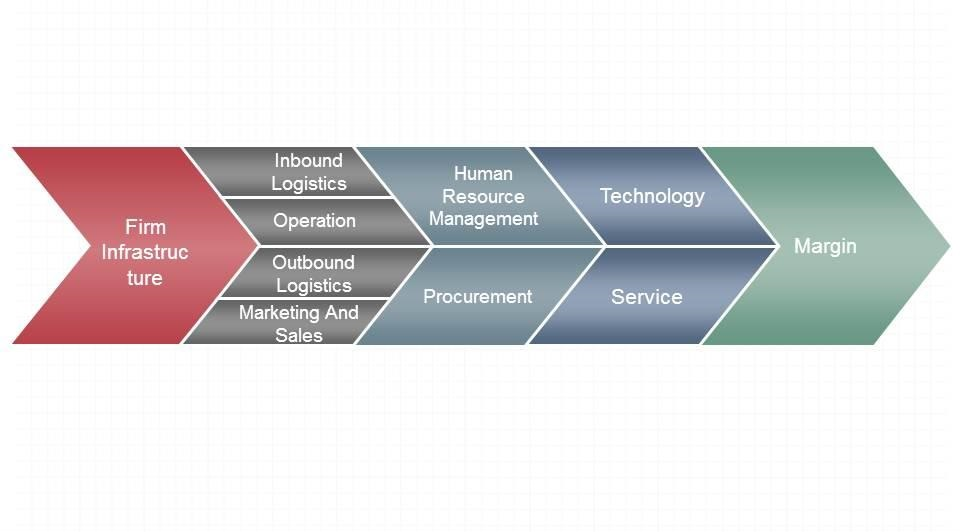

# What is supply chain analysis?

- Supply chain analysis is the process of evaluating every stage of a supply chain starting from the time the business acquires raw materials or supplies from its suppliers to the delivery of final products to the customers.

- The purpose of the analysis is to determine which part of the supply chain can be improved or shortened to deliver the product more quickly and efficiently to the customers.

# What are supply chain analytics and it's different types?

- Each of these supply chain analytics can increase the overall efficiency of business operations, which can lead to sizable cost savings.

1. Descriptive Analytics focuses on understanding what happened in the past by analyzing historical data. It can provide insights on key performance metrics, such as inventory levels, lead times, and delivery performance. Descriptive analytics can help identify patterns and trends in past supply chain operations, allowing organizations to make informed decisions about future strategies.

2. Diagnostic Analytics goes beyond descriptive analytics by identifying the root causes of supply chain issues. By analyzing data from different sources, such as suppliers, logistics providers, and customers, organizations can identify the factors that contribute to delays, disruptions, or quality issues in their supply chain. This can help them take corrective actions to prevent similar problems from happening in the future.

3. Predictive Analytics uses statistical models and machine learning algorithms to forecast future supply chain events. By analyzing historical data, organizations can identify patterns and trends that can help predict demand, inventory levels, and delivery performance. This can help organizations optimize their supply chain operations, reduce costs, and improve customer satisfaction.

4. Prescriptive Analytics takes predictive analytics one step further by providing recommendations on how to optimize supply chain operations. By using optimization algorithms and simulations, prescriptive analytics can help organizations identify the best course of action to improve supply chain performance. This can help organizations make better decisions and improve their overall supply chain efficiency.



# How to conduct supply chain analysis

- The above analytics should be used when conducting supply chain analysis. The basic steps of an analysis are:

    - Define your objectives.
    - Research the market.
    - Conduct in-depth supplier analysis.
    - Identify key market indicators
    - Pull together your findings and outline final suggestions - I'd recommend taking a look at using SharpCloud as a visual presentation tool.

# DataSet

- Here is a dataset we collected from a Fashion and Beauty startup. The dataset is based on the supply chain of Makeup products. Below are all the features in the dataset:

    - Product Type
    - SKU
    - Price
    - Availability
    - Number of products sold
    - Revenue generated
    - Customer demographics
    - Stock levels
    - Lead times
    - Order quantities
    - Shipping times
    - Shipping carriers
    - Shipping costs
    - Supplier name
    - Location
    - Lead time
    - Production volumes
    - Manufacturing lead time
    - Manufacturing costs
    - Inspection results
    - Defect rates
    - Transportation modes
    - Routes
    - Costs

# Import Libraries

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

# Read Data

In [2]:
data = pd.read_csv("/kaggle/input/supply-chain-dataset/supply_chain_data.csv")

In [3]:
print(data.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

# Descriptive Statistics

In [4]:
print(data.describe())

            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0

# Product type and Price

- analyzing the Supply Chain by looking at the relationship between the price of the products and the revenue generated by them:

In [5]:
fig = px.scatter(data, x='Price', 
                 y='Revenue generated', 
                 color='Product type', 
                 hover_data=['Number of products sold'], 
                 trendline="ols")
fig.show()

# Sales by Product Type

- The company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate. Now let’s have a look at the sales by product type:

In [6]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type', 
                   title='Sales by Product Type', 
                   hover_data=['Number of products sold'],
                   hole=0.5,
                   color_discrete_sequence=px.colors.qualitative.Pastel)
                   
pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.show()

### So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.

# Total Revenue by Shipping Carrier

In [7]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'], 
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue by Shipping Carrier', 
                  xaxis_title='Shipping Carrier', 
                  yaxis_title='Revenue Generated')
fig.show()

# Product type

- The company is using three carriers for transportation, and Carrier B helps the company in generating more revenue. Now let’s have a look at the Average lead time and Average Manufacturing Costs for all products of the company:

In [8]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_costs = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs, on='Product type')
result.rename(columns={'Lead time': 'Average Lead Time', 'Manufacturing costs': 'Average Manufacturing Costs'}, inplace=True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157


# Analyzing SKUs


- There’s a column in the dataset as SKUs. You must have heard it for the very first time. So, SKU stands for Stock Keeping Units. They’re like special codes that help companies keep track of all the different things they have for sale. Imagine you have a large toy store with lots of toys. Each toy is different and has its name and price, but when you want to know how many you have left, you need a way to identify them. So you give each toy a unique code, like a secret number only the store knows. This secret number is called SKU.

# Revenue generated by SKU

In [9]:
revenue_chart = px.line(data, x='SKU', 
                        y='Revenue generated', 
                        title='Revenue Generated by SKU')
revenue_chart.show()

# Stock Levels by SKU

- Stock levels refer to the number of products a store or business has in its inventory. Now let’s have a look at the stock levels of each SKU:

In [10]:
stock_chart = px.line(data, x='SKU', 
                      y='Stock levels', 
                      title='Stock Levels by SKU')
stock_chart.show()

# Order Quantity by SKU

In [11]:
order_quantity_chart = px.bar(data, x='SKU', 
                              y='Order quantities', 
                              title='Order Quantity by SKU')
order_quantity_chart.show()

# Shipping Costs by Carrier


In [12]:
shipping_cost_chart = px.bar(data, x='Shipping carriers', 
                             y='Shipping costs', 
                             title='Shipping Costs by Carrier')
shipping_cost_chart.show()

### In one of the above visualizations, we discovered that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three.

# Cost Distribution by Transportation Mode

In [13]:
transportation_chart = px.pie(data, 
                              values='Costs', 
                              names='Transportation modes', 
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

### So the company spends more on Road and Rail modes of transportation for the transportation of Goods.

# Analyzing Defect Rate

- The defect rate in the supply chain refers to the percentage of products that have something wrong or are found broken after shipping.

# Average Defect Rates by Product Type

In [14]:
defect_rates_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rates_by_product, x='Product type', y='Defect rates',
             title='Average Defect Rates by Product Type')
fig.show()

### So the defect rate of haircare products is higher. 

# Defect Rates by Transportation Mode

In [15]:
pivot_table = pd.pivot_table(data, values='Defect rates', 
                             index=['Transportation modes'], 
                             aggfunc='mean')

transportation_chart = px.pie(values=pivot_table["Defect rates"], 
                              names=pivot_table.index, 
                              title='Defect Rates by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

### Road transportation results in a higher defect rate, and Air transportation has the lowest defect rate.

# Summary

- Supply Chain Analysis means analyzing various components of a Supply Chain to understand how to improve the effectiveness of the Supply Chain to create more value for customers.